# Python for Spatial Analysis
### Second part of the module of GG3209 Spatial Analysis with GIS
---
# Notebook to practice Spatial Clustering - Exercises
---
Dr Fernando Benitez -  University of St Andrews - School of Geography and Sustainable Development

# 1. Get the required data in your Drive

Go to [Kaggle - Car Accidents in the UK](https://www.kaggle.com/datasets/devansodariya/road-accident-united-kingdom-uk-dataset/) and download the **Road Accident (United Kingdom (UK)) dataset**. This dataset included **more than a millon of observations. So you definitly need to slide it to be able to work on Colab. This will be one of the challenges you will face.**

Upload the dataset in your **Google Drive**, Make sure you mount the Drive (if you don't recall how to do that, check the guideline about GeoPandas) in this Notebook so you can access the data in the following tasks.


---




In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# 2. Exploratory Data Analysis and K-means Clustering

Install additional libraries like Lonboard to display large datasets.

## Part A: Data Exploration and Pre-Processing

1. Use pandas to load the car accidents dataset.
2. Display the first few rows to understand the available attributes.
3. Keep only the necessary columns, have a mix of Numerical and Categorical attributes
4. Slice (cut) the pandas dataframe by including only records from 2010, which will reduce your dataset to approx 770585 rows.
5. Make a simple plot to represent which day of the week historically has had more car accidents. Which day?
6. Make a second plot to explore the relationship between **Accident Severity** and **Road Conditions**. What insights can you gain about that?. Use a Text Cell reflecting on the previous charts.
7. Using Lonboard Library map all the car accidents included in the filtered dataset.
8. Make a spatial filter (create a new dataset) to map only the car accidents In the Glasgow-Edinburgh Region, create another map using the lonboard library to display the car accidents only in that region.

## Part B: K-means Clustering Implementation:

1. Implement K-means clustering with different values of k. (e.g 3 and 5 clusters) To the filtered dataset you have created for the Glasgow-Edinburgh region.
2. Map the clusters using the lonboard library.
3. Describe in a Text Cell the clustering results. **How does the choice of k impact the clusters?**. Describe how the clusters change once you adjust multiple versions of that required parameter.
4. **Finally**: In the guideline, we worked using only the coordinates to create the clusters (`['Longitude', 'Latitude'`]), in another code cell, implement K-means clustering again, but now using the attributes included in the dataframe like `Accident_Severity, Number_of_Vehicles`.
5. Visualise the results using the `lonboard` library.
6. In a Text Cell, reflect on the clusters that include only the coordinates and the ones that also include other attributes. What insights can you gain about that?

---



Installing the libraries




In [ ]:
pip install lonboard

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import geopandas as gpd
# This is a super popular library for working with ML and DL algorithms.
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import shapely
import folium
import seaborn as sns
from lonboard import Map, ScatterplotLayer, viz

# **Part 2: Section A**

First I will use Pandas to import the dataset:

In [ ]:
UK_accidents = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Week 9/UK_Accident.csv')#this imports the entire UK_accidents dataset.

Now I will use the .head to display the first 5 rows of data and understand what the dataset looks like better.

In [ ]:
UK_accidents.head()#this will allow us to visualise the first 5 rows of data.

Now I will process the data to remove the coloums that are not necessary for this analysis

In [ ]:
print(UK_accidents.columns.tolist())#this tells me the exat names of the coloums, so i can remove the uncessary ones.

the .drop function can be used to drop the uncessary coloums. The axis=1 at the end specifies that I will be removing coloums, not rows.

In [ ]:
UK_accidents = UK_accidents.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR','1st_Road_Class', '1st_Road_Number', '2nd_Road_Class', '2nd_Road_Number', 'Pedestrian_Crossing-Physical_Facilities', 'Special_Conditions_at_Site', 'Carriageway_Hazards','LSOA_of_Accident_Location'], axis=1)
UK_accidents.head()


Next I will slice my data to only include accidents from 2010 onwards.


In [ ]:
Accidents_post2010 = UK_accidents[UK_accidents['Year'] >= 2010] # >= filters for all years greater than or equal to 2010

num_rows = len(Accidents_post2010) #Here I am checking the number of rows in the data set, to make sure it aligns with the suggested number in the guide. You can also use the .head() function to check that your filter worked for the first couple of rows.
print("Number of rows:", num_rows)

Now I will find the day of the week with the most car accidents. To do this I will count the values in each day of the week for the coloum, as shown below.

In [ ]:
Highestaccidentsday = Accidents_post2010['Day_of_Week'].value_counts() # this tells me what the values are for the days of the week.
print(Highestaccidentsday)

The day of the week with the most car accidents is 6. Now I will create a simple plot to showcase this more clearly.

In [ ]:
plt.figure(figsize=(10, 6)) #this is the size of the image
plt.bar(Highestaccidentsday.index, Highestaccidentsday.values, color='blue') #.index represents the names of the rows used for the graph, and .values represents the values used in the graph.
plt.xlabel('Day of the Week') #label of the x axis
plt.ylabel('Number of Car Accidents') # label of the y axis
plt.title('Number of Car Accidents by Day of the Week') #figure title
plt.show() #displays the plot on the screen

Next we will plot accident severity with road conditions

In [ ]:
roads = Accidents_post2010['Road_Surface_Conditions']
accidents = Accidents_post2010['Accident_Severity']

# group the relevant variales and pivot the varibles so you can plot relationship more easily.
pivot_counts = (
    Accidents_post2010.groupby(["Accident_Severity", "Road_Surface_Conditions"])
      .size()
      .unstack(fill_value=0)
)

plt.figure(figsize=(10, 6))
pivot_counts.plot(kind="bar")
plt.xlabel("Accident Severity")
plt.ylabel("Number of Accidents")
plt.title("Accident Severity by Road Surface Conditions")
plt.tight_layout()
plt.show()

The majority of accidents occur on dry surface conditions, no matter the severity. The majority of accidents have a high severity, of 3. The second most frequent road condition for an accident is wet/damp surfaces.

Next, I will use the Lonboard Library map to map all the car accidents included in the filtered dataset.

In [ ]:
pip install lonboard

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import lonboard as lb
# This is a super popular library for working with ML and DL algorithms.
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import shapely
import folium
import seaborn as sns
from lonboard import Map, ScatterplotLayer, viz

In [ ]:
#I will create a name for my filtered dataframe:
df_map = Accidents_post2010

In [ ]:
#Now I will check that there are no null values in the code:
(df_map["Latitude"].isnull() | df_map["Longitude"].isnull()).mean()

As the value of the mean is 0,0, it meas that no rows in the data have missing values.

In [ ]:
#Next I will create a GeoDataFrame from the data.
geometry = gpd.points_from_xy(df_map.Longitude, df_map.Latitude)
gdf_accidents = gpd.GeoDataFrame(df_map, geometry=geometry, crs="EPSG:4326")
gdf_accidents.head()

In [ ]:
#Now i can use longboard to map the dataframe.
viz(gdf_accidents)

Now I will make a spatial filter, creating a  new dataset, to map only the car accidents In the Glasgow-Edinburgh Region. I will then create another map using the lonboard library to display the car accidents only in that region.

I am using the tool the tool https://norbertrenner.de/osm/bbox.html to get the precise boundary box I need for Glasgow and Edinbrugh.

In [ ]:
Glg_Edi_bbox = [-4.546,55.738,-2.98,56.061] # Glasgow-Edi Box

In [ ]:
#Now I will slice the dataset based on the new boundaries.
gdf_accidents = gdf_accidents[gdf_accidents.intersects(shapely.box(*Glg_Edi_bbox))]

Now I will use the lonboard library to check if the spatial filter worked.

In [ ]:
viz(gdf_accidents)

# **Part B**

Implement K-means clustering with different values of k. (e.g 3 and 5 clusters) To the filtered dataset you have created for the Glasgow-Edinburgh region.

In [ ]:
#I start by uring Kmeans, which groups data points into clusters based on similarity.
kmeans = KMeans(n_clusters=5, random_state=42)
gdf_accidents['kmeans_cluster'] = kmeans.fit_predict(gdf_accidents[['Longitude', 'Latitude']])

/usr/local/lib/python3.12/dist-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Now I will map the clusters using the lonboard library.

In [ ]:
import plotly.express as px

fig_kmeans = px.scatter_mapbox(
    gdf_accidents,
    lat="Latitude",
    lon="Longitude",
    color="kmeans_cluster",
    mapbox_style="carto-positron",
    zoom=9,  # Adjust zoom level as needed
    title="K-means Clustering of Road accidents post 2010",
    height=700,    # Set initial height in pixels (width is responsive)
    opacity=0.5,

)
fig_kmeans.show()

The results show five different clusters, ranging from yellow to a deep blue. This is becaue I specified in kmeans that the number of clusters was 5. k is the number of clusters the algoritim creates. Each data point is assigned to the nearest cluster that you created. Choosing a different number of k determines how many groups the data is split into. A smaller k would mean there were less colours on the map, as the clusters cover larger areas. The inverse would happen if there was a larger k.

Now I will use k-means clustering for the attributes of  Accident_Severity and Number_of_Vehicles.

In [ ]:
# first i will select the features
X = gdf_accidents[['Accident_Severity', 'Number_of_Vehicles']]

In [ ]:
# Now I will start KMeans
kmeans = KMeans(n_clusters=5, random_state=42)

In [ ]:
# Next I will fit the model and predict cluster labels

gdf_accidents['kmeans_cluster_attributes'] = kmeans.fit_predict(X)

/usr/local/lib/python3.12/dist-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Now I will create a new scatterplot. In this case, each accident is grouped into clusters based on accident severity and number of vechicles
fig = px.scatter_mapbox(
    gdf_accidents,
    lat="Latitude",
    lon="Longitude",
    color="kmeans_cluster_attributes",  # cluster from Accident_Severity & Number_of_Vehicles
    mapbox_style="carto-positron",      # clean map style
    zoom=9,
    opacity=0.6,
    height=700,
    title="Accidents Clustered by Severity & Number of Vehicles",
    labels={"kmeans_cluster_attributes": "Accident Cluster"}  # rename legend
)
fig.show()

When we cluster using only coordinates, the groups show where accidents happen a lot, like hotspots on the map. It does not tell us anything about how serious the accidents are or how many vehicles were involved.

When we include attributes of Accident Severity and Number of Vehicles, the clusters show what kind of accidents happen, no matter where they are. Plotting these clusters on the map lets us see if certain types of accidents tend to happen in specific areas.

Combining both approaches gives a better idea of where and what kind of accidents happen.

# 3. Spatial Analysis and DBSCAN Clustering

## Part A: Spatial Correlation

1. Create another GeoPandas Dataframe by rereading the data to avoid any confusion with the previous geodataframe. This new one is about DBSCAN name it accordingly.

2. Using the [BBox website](https://boundingbox.klokantech.com/), filter the
new geodataframe to contain only the accidents around **Birmingham**.

3. Using the Lonboard library, map the filtered dataset in **Birmingham**.

Before creating any spatial clustering, **it would be beneficial to explore any correlations to identify potential relationships between variables**, such as whether bad weather conditions influence accident severity or whether the number of vehicles involved correlates with the number of casualties.

4. In a code cell, investigate the data type of the attribute list, so you can identify which attributes are numerical and which are categorical. Tip: use `.dtypes`

5. In a code cell. Run the correlation between the numerical attributes by including in your code `corr= your_dataframe.corr()`

**You probably got an error running the previous code.**
**How can you solve this issue?**

Before asking ChatGPT or any GenAI tool, try **Pandas documentation** and see the parameters of the **corr** function, and find which is the parameter you need to only create a correlation matrix only for the numerical attributes. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html


6. In a new Code Cell. Adjust the following code to create a heatmap plot of your correlation values.

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    your_corr_variable,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',           # Format annotations to 2 decimal places
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title('Pearson -Correlation Matrix')
plt.show()

In terms of predictive modelling, having strong correlations indicate that one variable is an excellent predictor of the other. For example, if `Number_of_Casualties` has a 0.99 correlation (Pearson) with a separate column called `Injured_People_Count`, you know they convey almost identical information.

But **therer are downsides like potential Multicollinearity**, which means, if you are building a predictive model (like linear regression), having two variables that are too highly correlated (often > 0.9) can cause multicollinearity and require you to remove one of them.

Here is where our module associated with **Spatial Data Science** plays an important role. **Spatial statistical models** differ from standard (non-spatial) statistical models because they explicitly account for geographic location and the principle that nearby things are more related than distant things. The first law of geography.

In the same way you have evaluated and learn from the GWR method, in this exercise, we can apply Moran's I.

In this context of our car accident dataset, while a standard stadistic(Pearson) might tell you that severe weather correlates globally with severe accidents, a spatial model could tell us that this relationship only holds true in coastal areas, while in mountain areas, road surface conditions are more important locally.

---

7. Install the library **pysal** by running in a code cell:
`pip install pysal `

8. Now import the new and requieres libraries.

```
import libpysal.weights as weights
from esda.moran import Moran
```
9. You must reproject your dataset (recall the EPSG code you used in the guideline notebook to study spatial data in the UK)



After you reproject the dataset, you can now use it to run Local Moran's I and Spatial clustering DBSCAN. **Adjust the following code to match your variable and datasets**

In [ ]:
w = weights.DistanceBand.from_dataframe(your_dataset_projected, threshold=500, ids=your_dataset.index) #Adjust this line to match your variables.
w.transform = 'R'
moran = Moran(your_dataset['Accident_Severity'], w) #Adjust this line to match your variables.

print(f"\n--- Moran's I Spatial Autocorrelation Analysis ---")
print(f"Defined {w.n} observations and {w.mean_neighbors:.2f} average neighbors per point.")
print(f"\nMoran's I Statistic (Observed I): {moran.I:.4f}")
print(f"P-value (significance): {moran.p_sim:.4f}")

NameError: name 'your_dataset_projected' is not defined

**How to read the results:**

The resulting moran.I value tells you about the spatial pattern defined in the requested dataset.

- **Near +1**: High positive spatial autocorrelation
- **Near -1**: Negative spatial autocorrelation
- **Near 0**: A random spatial pattern

10. In a Text Cell, describe with your own words the results., What insights can you gain from the correlation analysis.

In [ ]:
#First I am importing the dataframe using a new name to avoid confusion with part 2
df_DBSCAN = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Week 9/UK_Accident.csv')#this imports the entire UK_accidents dataset.

In [ ]:
#Now I can create a GeoDataFrame
geometry = gpd.points_from_xy(df_DBSCAN.Longitude, df_DBSCAN.Latitude)
gdf_DBSCAN = gpd.GeoDataFrame(df_DBSCAN, geometry=geometry, crs="EPSG:4326")
gdf_DBSCAN.head()

Unnamed: 0 Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0           0  200501BS00001               525680.0                178240.0   
1           1  200501BS00002               524170.0                181650.0   
2           2  200501BS00003               524520.0                182240.0   
3           3  200501BS00004               526900.0                177530.0   
4           4  200501BS00005               528060.0                179040.0   

   Longitude   Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  -0.191170  51.489096             1                  2                   1   
1  -0.211708  51.520075             1                  3                   1   
2  -0.206458  51.525301             1                  3                   2   
3  -0.173862  51.482442             1                  3                   1   
4  -0.156618  51.495752             1                  3                   1   

   Number_of_Casualties  ...                         Light_Conditions  \
0                     1  ...           Daylight: Street light present   
1                     1  ...  Darkness: Street lights present and lit   
2                     1  ...  Darkness: Street lights present and lit   
3                     1  ...           Daylight: Street light present   
4                     1  ...        Darkness: Street lighting unknown   

           Weather_Conditions Road_Surface_Conditions  \
0  Raining without high winds                Wet/Damp   
1     Fine without high winds                     Dry   
2     Fine without high winds                     Dry   
3     Fine without high winds                     Dry   
4     Fine without high winds                Wet/Damp   

   Special_Conditions_at_Site Carriageway_Hazards  Urban_or_Rural_Area  \
0                         NaN                 NaN                    1   
1                         NaN                 NaN                    1   
2                         NaN                 NaN                    1   
3                         NaN                 NaN                    1   
4                         NaN                 NaN                    1   

   Did_Police_Officer_Attend_Scene_of_Accident LSOA_of_Accident_Location  \
0                                          Yes                 E01002849   
1                                          Yes                 E01002909   
2                                          Yes                 E01002857   
3                                          Yes                 E01002840   
4                                          Yes                 E01002863   

   Year                   geometry  
0  2005   POINT (-0.19117 51.4891)  
1  2005  POINT (-0.21171 51.52008)  
2  2005   POINT (-0.20646 51.5253)  
3  2005  POINT (-0.17386 51.48244)  
4  2005  POINT (-0.15662 51.49575)  

[5 rows x 34 columns]

In [ ]:
#Now I will filter to only select Birmingham
ld_bbox = [-2.225391,52.351459,-1.680194,52.67323]

In [ ]:
#Next I am slicing the dataset based on Birmingham boundaries
gdf_DBSCAN = gdf_DBSCAN[gdf_DBSCAN.intersects(shapely.box(*ld_bbox))]

In [152]:
#Now we can visualise the map.
viz(gdf_DBSCAN)

Map(basemap=MaplibreBasemap(mode='interleaved', style=<CartoStyle.DarkMatter: 'https://basemaps.cartocdn.com/g…

In [ ]:
#Now I will check the data types of all coloums in gdf_DBSCAN
gdf_DBSCAN.dtypes

Unnamed: 0                                        int64
Accident_Index                                   object
Location_Easting_OSGR                           float64
Location_Northing_OSGR                          float64
Longitude                                       float64
Latitude                                        float64
Police_Force                                      int64
Accident_Severity                                 int64
Number_of_Vehicles                                int64
Number_of_Casualties                              int64
Date                                             object
Day_of_Week                                       int64
Time                                             object
Local_Authority_(District)                        int64
Local_Authority_(Highway)                        object
1st_Road_Class                                    int64
1st_Road_Number                                   int64
Road_Type                                        object
Speed_limit                                       int64
Junction_Control                                 object
2nd_Road_Class                                    int64
2nd_Road_Number                                   int64
Pedestrian_Crossing-Human_Control                object
Pedestrian_Crossing-Physical_Facilities          object
Light_Conditions                                 object
Weather_Conditions                               object
Road_Surface_Conditions                          object
Special_Conditions_at_Site                       object
Carriageway_Hazards                              object
Urban_or_Rural_Area                               int64
Did_Police_Officer_Attend_Scene_of_Accident      object
LSOA_of_Accident_Location                        object
Year                                              int64
geometry                                       geometry
dtype: object

Now I will calcualte the correlation between all numerical attributes in the dataframe. To do this i first need to select only the numerical colums.

In [ ]:
#Now I will calcualte the correlation between all  attributes in the dataframe
corr = gdf_DBSCAN.corr()
print(corr)

ValueError: could not convert string to float: '200520D002602'

The above cell did not work because some of the attributes were not nuerical. I have fixed this below by slecting only numerical values.

In [ ]:
corr = gdf_DBSCAN.corr(numeric_only=True)
print(corr)

                            Unnamed: 0  Location_Easting_OSGR  \
Unnamed: 0                    1.000000               0.007884   
Location_Easting_OSGR         0.007884               1.000000   
Location_Northing_OSGR        0.008212              -0.231080   
Longitude                     0.007900               0.999999   
Latitude                      0.008208              -0.231816   
Police_Force                  0.021802               0.088299   
Accident_Severity            -0.004004               0.017291   
Number_of_Vehicles           -0.000385               0.013965   
Number_of_Casualties          0.001557               0.003062   
Day_of_Week                   0.002222              -0.005181   
Local_Authority_(District)   -0.018386              -0.068784   
1st_Road_Class               -0.008246              -0.010583   
1st_Road_Number              -0.002654               0.015043   
Speed_limit                   0.014223               0.063709   
2nd_Road_Class           

Now I will create a heatmap using the above correlation values

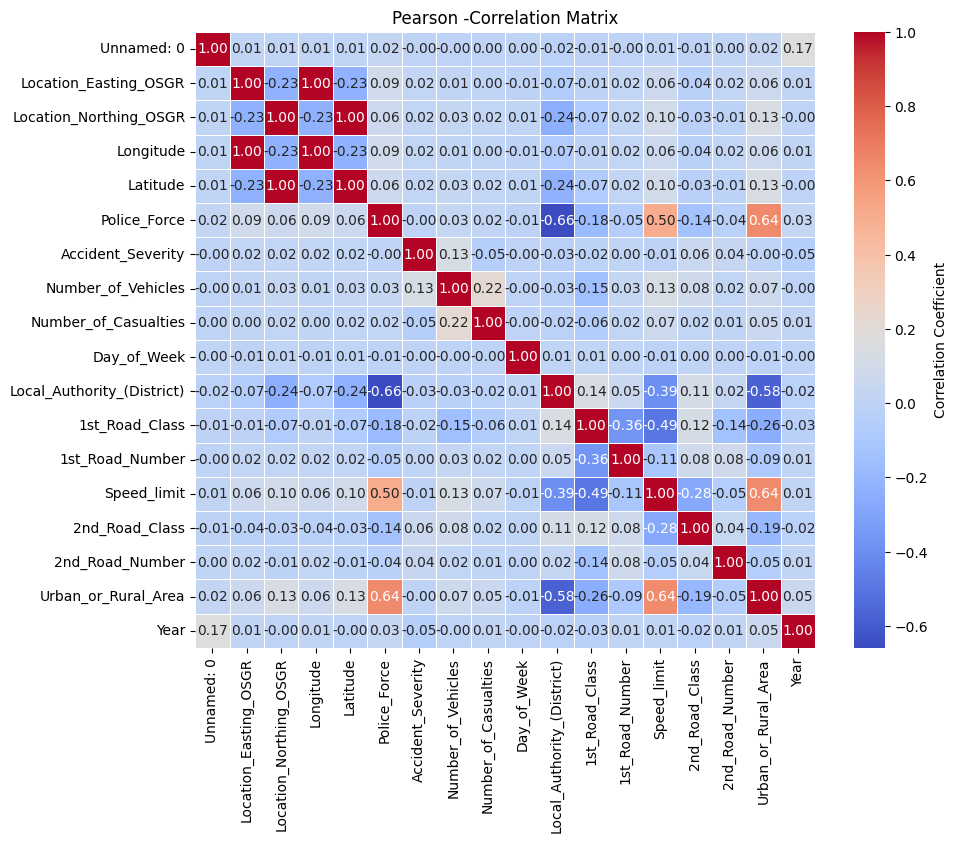

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',           # Format annotations to 2 decimal places
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title('Pearson -Correlation Matrix')
plt.show()

In [ ]:
pip install pysal

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.1/157.1 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.1/248.1 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.9/389.9 kB 23.8 MB/s eta 0:00:00
   ━━━━━

In [ ]:
import libpysal.weights as weights
from esda.moran import Moran

In [ ]:
print(gdf_DBSCAN.crs)

EPSG:4326


In [ ]:
#Now I will reproject the dataset
gdf_Part3A = gdf_DBSCAN.to_crs(epsg=27700)
gdf_Part3A.head()

Unnamed: 0 Accident_Index  Location_Easting_OSGR  \
77220       77220  200520D002602               411470.0   
77221       77221  200520D002703               410540.0   
77222       77222  200520D004203               414090.0   
77223       77223  200520D004603               408930.0   
77224       77224  200520D006503               409780.0   

       Location_Northing_OSGR  Longitude   Latitude  Police_Force  \
77220                293030.0  -1.832342  52.534986            20   
77221                285350.0  -1.846293  52.465961            20   
77222                284140.0  -1.794089  52.455003            20   
77223                286770.0  -1.869954  52.478755            20   
77224                285710.0  -1.857470  52.469211            20   

       Accident_Severity  Number_of_Vehicles  Number_of_Casualties  ...  \
77220                  2                   1                     3  ...   
77221                  3                   2                     2  ...   
77222                  3                   1                     1  ...   
77223                  1                   1                     2  ...   
77224                  3                   2                     1  ...   

                              Light_Conditions       Weather_Conditions  \
77220  Darkness: Street lights present and lit     Fine with high winds   
77221           Daylight: Street light present  Fine without high winds   
77222           Daylight: Street light present  Fine without high winds   
77223           Daylight: Street light present  Fine without high winds   
77224  Darkness: Street lights present and lit  Fine without high winds   

      Road_Surface_Conditions  Special_Conditions_at_Site Carriageway_Hazards  \
77220                Wet/Damp                         NaN                 NaN   
77221                     Dry                         NaN                 NaN   
77222               Frost/Ice                         NaN                 NaN   
77223                     Dry                         NaN                 NaN   
77224                Wet/Damp                         NaN                 NaN   

       Urban_or_Rural_Area  Did_Police_Officer_Attend_Scene_of_Accident  \
77220                    1                                          Yes   
77221                    1                                          Yes   
77222                    1                                          Yes   
77223                    1                                          Yes   
77224                    1                                          Yes   

      LSOA_of_Accident_Location  Year                       geometry  
77220                 E01009462  2005  POINT (411469.481 293026.773)  
77221                 E01009337  2005  POINT (410539.483 285346.639)  
77222                 E01009316  2005  POINT (414089.556 284136.542)  
77223                 E01009199  2005  POINT (408929.458 286766.629)  
77224                 E01009380  2005  POINT (409779.434 285706.598)  

[5 rows x 34 columns]

In [ ]:
w = weights.DistanceBand.from_dataframe(gdf_Part3A, threshold=500, ids=gdf_Part3A.index)
w.transform = 'R'
moran = Moran(gdf_Part3A['Accident_Severity'], w)

print(f"\n--- Moran's I Spatial Autocorrelation Analysis ---")
print(f"Defined {w.n} observations and {w.mean_neighbors:.2f} average neighbors per point.")
print(f"\nMoran's I Statistic (Observed I): {moran.I:.4f}")
print(f"P-value (significance): {moran.p_sim:.4f}")

('WARNING: ', 88266, ' is an island (no neighbors)')
('WARNING: ', 88718, ' is an island (no neighbors)')
('WARNING: ', 89654, ' is an island (no neighbors)')
('WARNING: ', 95625, ' is an island (no neighbors)')
('WARNING: ', 278169, ' is an island (no neighbors)')
('WARNING: ', 278415, ' is an island (no neighbors)')
('WARNING: ', 282338, ' is an island (no neighbors)')
('WARNING: ', 282779, ' is an island (no neighbors)')
('WARNING: ', 283034, ' is an island (no neighbors)')
('WARNING: ', 283412, ' is an island (no neighbors)')
('WARNING: ', 284927, ' is an island (no neighbors)')
('WARNING: ', 284971, ' is an island (no neighbors)')
('WARNING: ', 285256, ' is an island (no neighbors)')
('WARNING: ', 287908, ' is an island (no neighbors)')
('WARNING: ', 463344, ' is an island (no neighbors)')
('WARNING: ', 463506, ' is an island (no neighbors)')
('WARNING: ', 465112, ' is an island (no neighbors)')
('WARNING: ', 466526, ' is an island (no neighbors)')
('WARNING: ', 466602, ' is an is

Both the Moran's I and the P-value are very close to 0. This means there is almost no spatial correlation, and the patterns of accident severity do not form clear clusters. The P-value indicates that the pattern is random. There is no statistically significant relationship.

## Part B: DBSCAN Clustering Implementation:

1. Implement DBSCAN clustering with different **eps** and **min_samples** to the projected dataset.
2. Map the clusters using the Plotly Library.
3. Describe in a Text Cell the clustering results. **How does the choice of eps and min_samples impact the clusters?**. Describe how the clusters change once you adjust multiple versions of that required parameter.
4. In a Text Cell, briefly reflect on the clusters created using **K-Means** and the ones generated with **DBSCAN**. What insights can you gain from that?, Do you see any limitations?
5. Finally, in a new text cell address the following question: **What do you think are the real-world implications of the identified clusters in the field of urban planning?**

---

If you finished the initial guide and all the challenges included in this notebeook. **Upload the finished version of both notebooks to your GitHub repository** (check how to do it in the workbook lab document included in Moodle), and **Congrats you have finished**

### **Important Note:** Avoid using ChatGPT for your reflective notes. Instead, describe in your own words what you observe from your analysis results. I want to see and read your authentic thoughts and insights based on your understanding, rather than a complicated or overly structured response. Take some time to evaluate the results you have obtained and make an effort to briefly describe what you have found.


To implement DBSCAN clustering I need to start by using the geometry colum to extrac the X/Y coordinates of my dataset for DBSCAN. This is shown below:

In [123]:
gdf_Part3A['geometry_x'] = gdf_Part3A.geometry.x
gdf_Part3A['geometry_y'] = gdf_Part3A.geometry.y
gdf_Part3A.head()

Unnamed: 0 Accident_Index  Location_Easting_OSGR  \
77220       77220  200520D002602               411470.0   
77221       77221  200520D002703               410540.0   
77222       77222  200520D004203               414090.0   
77223       77223  200520D004603               408930.0   
77224       77224  200520D006503               409780.0   

       Location_Northing_OSGR  Longitude   Latitude  Police_Force  \
77220                293030.0  -1.832342  52.534986            20   
77221                285350.0  -1.846293  52.465961            20   
77222                284140.0  -1.794089  52.455003            20   
77223                286770.0  -1.869954  52.478755            20   
77224                285710.0  -1.857470  52.469211            20   

       Accident_Severity  Number_of_Vehicles  Number_of_Casualties  ...  \
77220                  2                   1                     3  ...   
77221                  3                   2                     2  ...   
77222                  3                   1                     1  ...   
77223                  1                   1                     2  ...   
77224                  3                   2                     1  ...   

      Road_Surface_Conditions  Special_Conditions_at_Site Carriageway_Hazards  \
77220                Wet/Damp                         NaN                 NaN   
77221                     Dry                         NaN                 NaN   
77222               Frost/Ice                         NaN                 NaN   
77223                     Dry                         NaN                 NaN   
77224                Wet/Damp                         NaN                 NaN   

       Urban_or_Rural_Area Did_Police_Officer_Attend_Scene_of_Accident  \
77220                    1                                         Yes   
77221                    1                                         Yes   
77222                    1                                         Yes   
77223                    1                                         Yes   
77224                    1                                         Yes   

       LSOA_of_Accident_Location  Year                       geometry  \
77220                  E01009462  2005  POINT (411469.481 293026.773)   
77221                  E01009337  2005  POINT (410539.483 285346.639)   
77222                  E01009316  2005  POINT (414089.556 284136.542)   
77223                  E01009199  2005  POINT (408929.458 286766.629)   
77224                  E01009380  2005  POINT (409779.434 285706.598)   

          geometry_x     geometry_y  
77220  411469.480976  293026.773085  
77221  410539.482560  285346.638896  
77222  414089.555690  284136.542478  
77223  408929.458440  286766.629044  
77224  409779.434074  285706.598471  

[5 rows x 36 columns]

Now I can define the parameters of the DBSCAN implementation:

In [149]:
meters_eps = 200
min_samples_val = 15

dbscan = DBSCAN(eps=meters_eps, min_samples=min_samples_val)

gdf_Part3A['dbscan_cluster'] = dbscan.fit_predict(
    gdf_Part3A[['geometry_x', 'geometry_y']])

gdf_Part3A.head()

Unnamed: 0 Accident_Index  Location_Easting_OSGR  \
77220       77220  200520D002602               411470.0   
77221       77221  200520D002703               410540.0   
77222       77222  200520D004203               414090.0   
77223       77223  200520D004603               408930.0   
77224       77224  200520D006503               409780.0   

       Location_Northing_OSGR  Longitude   Latitude  Police_Force  \
77220                293030.0  -1.832342  52.534986            20   
77221                285350.0  -1.846293  52.465961            20   
77222                284140.0  -1.794089  52.455003            20   
77223                286770.0  -1.869954  52.478755            20   
77224                285710.0  -1.857470  52.469211            20   

       Accident_Severity  Number_of_Vehicles  Number_of_Casualties  ...  \
77220                  2                   1                     3  ...   
77221                  3                   2                     2  ...   
77222                  3                   1                     1  ...   
77223                  1                   1                     2  ...   
77224                  3                   2                     1  ...   

      Special_Conditions_at_Site  Carriageway_Hazards Urban_or_Rural_Area  \
77220                        NaN                  NaN                   1   
77221                        NaN                  NaN                   1   
77222                        NaN                  NaN                   1   
77223                        NaN                  NaN                   1   
77224                        NaN                  NaN                   1   

       Did_Police_Officer_Attend_Scene_of_Accident LSOA_of_Accident_Location  \
77220                                          Yes                 E01009462   
77221                                          Yes                 E01009337   
77222                                          Yes                 E01009316   
77223                                          Yes                 E01009199   
77224                                          Yes                 E01009380   

       Year                       geometry     geometry_x     geometry_y  \
77220  2005  POINT (411469.481 293026.773)  411469.480976  293026.773085   
77221  2005  POINT (410539.483 285346.639)  410539.482560  285346.638896   
77222  2005  POINT (414089.556 284136.542)  414089.555690  284136.542478   
77223  2005  POINT (408929.458 286766.629)  408929.458440  286766.629044   
77224  2005  POINT (409779.434 285706.598)  409779.434074  285706.598471   

      dbscan_cluster  
77220              0  
77221              1  
77222              1  
77223             -1  
77224              1  

[5 rows x 37 columns]

Now I can map the final result

In [150]:
fig_dbscan = px.scatter_mapbox(
    gdf_Part3A,
    lat="Latitude",
    lon="Longitude",
    color="dbscan_cluster",
    mapbox_style="carto-positron",
    zoom=9,  # Adjust zoom level as needed
    title="DBSCAN Clustering",
    height=700,    # Set initial height in pixels (width is responsive)
    opacity=0.5,

)
fig_dbscan.show()

Having tested a variety of different eps and min_samples I settled on using:
1) A value of 15 for the min_samples. This is a relatively large value, however it works well because the dataset I am working with here is very large.
2) I have adjusted the eps to be smaller, I started at 400, however my clusters were too large and there was not enough visual differences between points.

There are several differences between the K-mean clusters and the DBSCAN clusters. The DBSCAN clusters find clusters based on density, and their results change based on the choice of eps and min_samples. On the other hand, K-means groups points into a set number of cluster (k), based either on location or attributes.

The K-mean cluseters tend to be evenly spaced, so it is good if a fixed number of clusters are required. The DBSCAN is better for finding dense hotspots within data.

The clusters show where accidents happen most often. This can be useful for policy makers and urban planners to indentify areas that need to be more closely monitered in order to avoid accidents.